In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

df = pd.read_csv('auto-mpg.csv',header=1)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['horsepower'].replace('?',np.nan,inplace=True)       
df.dropna(subset=['horsepower'],axis=0,inplace=True)    
df['horsepower'] = df['horsepower'].astype('float')    

ndf = df[['mpg','cylinders', 'horsepower', 'weight']]

X=ndf[['cylinders','horsepower','weight']]   # 독립 변수 X
Y=ndf[['mpg']]      # 종속 변수 Y

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (273, 3)
test data 개수:  (118, 3)


In [8]:
from sklearn.linear_model import LinearRegression       # 선형회귀분석

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data 모형 학습
lr.fit(X_train,Y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
r_square = lr.score(X_test, Y_test)
print(r_square)
print()

# 회귀식의 기울기
print('X 변수의 개수 a: ', lr.coef_)
print()

# 회귀식의 y절편
print('상수항 b: ', lr.intercept_)

0.7187012273294776

X 변수의 개수 a:  [[-0.56850996 -0.0422319  -0.00507452]]

상수항 b:  [46.28267147]


In [ ]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
Y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(Y_test, label='Y_test')
ax2 = sns.kdeplot(Y_hat, label='Y_hat',ax=ax1)
plt.legend()
plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


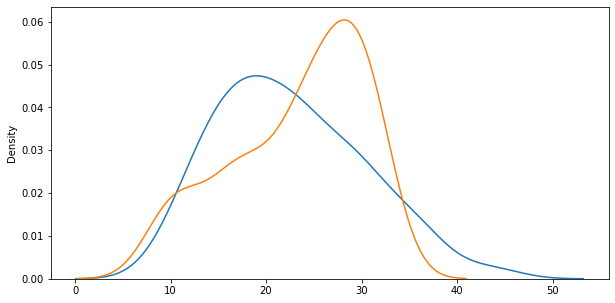

In [18]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력

Y_hat = lr.predict(X_test)

plt.figure(figsize = (10,5))
ax1 = sns.distplot(Y_test, hist = False, label = 'Y_test')
ax2 = sns.distplot(Y_hat, hist = False, label = 'Y_hat', ax = ax1)
plt.show()
plt.close()